In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

# plt.style.use('/home/aussing/sty.mplstyle')
plt.rcParams['figure.figsize']=(6,4)

In [2]:
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_003.z9.002.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_004.z5.655.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_005.z4.008.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_010.z1.227.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_015.z0.427.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_016.z0.335.AHF_halos'
# ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_023.z0.079.AHF_halos'
ahf_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/ahf/AHF.N2048_L65_sd46371-sn_010.snap_026.z0.000.AHF_halos'

# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_003.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_004.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_005.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_010.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_015.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_016.hdf5'
# subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_023.hdf5'
subfind_halos = '/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/fof_subhalo_tab_026.hdf5'

haloinfo_data = h5py.File(subfind_halos,'r')
z = np.round(haloinfo_data['Header'].attrs['Redshift'],2)
print(z)
UNITMASS = 1e10
LITTLEH = 0.6688
UNIT_LENGTH_FOR_PLOTS = 'Mpc'
npart_min = 20

0.0


In [3]:
def get_unit_len(snapshot):
    unit_length = snapshot["Parameters"].attrs['UnitLength_in_cm']
    
    return unit_length

In [4]:
def set_plot_len(data):
    if UNIT_LENGTH_FOR_PLOTS == 'Mpc':
        data = data/3.085678e24
    elif UNIT_LENGTH_FOR_PLOTS == 'Kpc':
        data = data/3.085678e21
    elif UNIT_LENGTH_FOR_PLOTS == 'pc':
        data = data/3.085678e18
    else:
        print("What units do you want?????!!! AARRHH")
        raise TypeError
    return data

In [5]:
ahf_cols = []
with open(ahf_halos) as ahf_f:
    aux_ahf_cols = ahf_f.readline()[1:].split('\t')
    for el in aux_ahf_cols:
        ahf_cols.append(el.rpartition('(')[0])
ahf_cols = ahf_cols[:-1]
ahf_cols = np.array(ahf_cols)

ahf_dat = pd.read_table(ahf_halos,delim_whitespace=True,names=ahf_cols,header=0)
print(ahf_cols)


['ID' 'hostHalo' 'numSubStruct' 'Mhalo' 'npart' 'Xc' 'Yc' 'Zc' 'VXc' 'VYc'
 'VZc' 'Rhalo' 'Rmax' 'r2' 'mbp_offset' 'com_offset' 'Vmax' 'v_esc' 'sigV'
 'lambda' 'lambdaE' 'Lx' 'Ly' 'Lz' 'b' 'c' 'Eax' 'Eay' 'Eaz' 'Ebx' 'Eby'
 'Ebz' 'Ecx' 'Ecy' 'Ecz' 'ovdens' 'nbins' 'fMhires' 'Ekin' 'Epot' 'SurfP'
 'Phi0' 'cNFW' 'mbp_Vx' 'mbp_Vy' 'mbp_Vz' 'n_gas' 'M_gas' 'lambda_gas'
 'lambdaE_gas' 'Lx_gas' 'Ly_gas' 'Lz_gas' 'b_gas' 'c_gas' 'Eax_gas'
 'Eay_gas' 'Eaz_gas' 'Ebx_gas' 'Eby_gas' 'Ebz_gas' 'Ecx_gas' 'Ecy_gas'
 'Ecz_gas' 'Ekin_gas' 'Epot_gas' 'n_star' 'M_star' 'lambda_star'
 'lambdaE_star' 'Lx_star' 'Ly_star' 'Lz_star' 'b_star' 'c_star' 'Eax_star'
 'Eay_star' 'Eaz_star' 'Ebx_star' 'Eby_star' 'Ebz_star' 'Ecx_star'
 'Ecy_star' 'Ecz_star' 'Ekin_star' 'Epot_star' 'mean_z_gas' 'mean_z_star'
 'n_star_excised' 'M_star_excised' 'mean_z_star_excised']


## Comparison of cumulative HMF

In [6]:
# print(np.sort(ahf_cols[:]))
print(np.min(ahf_dat["fMhires"]))
mainhaloes = ahf_dat[(ahf_dat['hostHalo']==0) & (ahf_dat['fMhires']==1) & (ahf_dat['npart']>npart_min)]
# mainhaloes = mainhaloes[ahf_dat['fMhires']==1]

halo_mass_ahf = np.sort(mainhaloes['Mhalo'])[::-1] / LITTLEH
cummass_func_ahf = np.cumsum(np.ones(len(mainhaloes)))

0.0


In [7]:
## Cumulative Halo mass function
halo_masstypes = np.array(haloinfo_data['Group']['GroupMassType'], dtype=np.float64) * UNITMASS / LITTLEH
halo_mass  = np.array(haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
halo_mass_m200  = np.array(haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH

clean_halos = np.where(halo_masstypes[:,5] == 0)[0]
grouplen_types = np.array(haloinfo_data['Group']['GroupLenType'], dtype=np.float64)
real_halos = np.where(grouplen_types[:,1] > npart_min)[0]
clean_halos = clean_halos[np.isin(clean_halos,real_halos)]

halo_mass_MH = halo_mass[clean_halos]
halo_mass_200 = halo_mass_m200[clean_halos]

ordered_halos_MH = np.argsort(halo_mass_MH)[::-1]
ordered_halos_200 = np.argsort(halo_mass_200)[::-1]

cummass_func_MH = np.cumsum(np.ones(halo_mass_MH[ordered_halos_MH].shape[0]))
cummass_func_200 = np.cumsum(np.ones(halo_mass_200[ordered_halos_200].shape[0]))


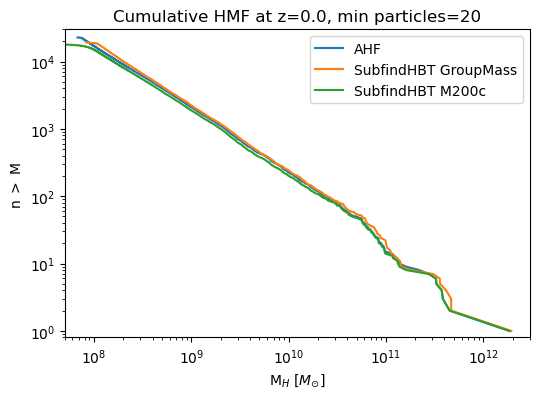

In [8]:
plt.plot(halo_mass_ahf,cummass_func_ahf,label='AHF')
plt.plot(halo_mass_MH[ordered_halos_MH],cummass_func_MH,label=f"SubfindHBT GroupMass")
plt.plot(halo_mass_200[ordered_halos_200],cummass_func_200,label=f"SubfindHBT M200c")
# z = np.round(z,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
# plt.ylabel(r'n $>$ M [Mpc$^{-3}$ $h^3$]')
plt.ylabel(r'n $>$ M ')
# plt.title(f'Cumulative SHMF at z={z}')
plt.title(f'Cumulative HMF at z={z}, min particles={npart_min}')
plt.legend()
plt.xlim((5e7,3e12))
plt.ylim((0.8,3e4))
# plt.savefig(f'{folder}/cumulative_shmf_z_{z}.png',dpi=400,bbox_inches='tight')
plt.savefig(f'./plots/cumulative_hmf_z_{z}_npart_{npart_min}.png',dpi=400,bbox_inches='tight')

## Differential HMF

In [9]:
snap_data = h5py.File('/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/snapshot_026.hdf5','r')
pos_data = h5py.File('/fred/oz217/aussing/N2048_L65_sd46371/cdm/zoom/output/sn_010/snapshot_000.hdf5', 'r') 
unit_length = get_unit_len(snap_data)

highdm_pos = np.array(pos_data[f'PartType1']['Coordinates'], dtype=np.float64) * unit_length
x_extent = np.max(highdm_pos[:,0])-np.min(highdm_pos[:,0])
y_extent = np.max(highdm_pos[:,1])-np.min(highdm_pos[:,1])
z_extent = np.max(highdm_pos[:,2])-np.min(highdm_pos[:,2])
box_volume=x_extent*y_extent*z_extent
print(set_plot_len(box_volume**(1/3)))

halo_mass  = np.array(haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
halo_mass_m200c  = np.array(haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH

bin_width = 0.1
num_of_bins = np.int32((np.max(np.log10(halo_mass)+1e-4) - np.min(np.log10(halo_mass))-1e-4)/bin_width)
bin_range = np.linspace(np.min(np.log10(halo_mass)-1e-4),np.max(np.log10(halo_mass)+1e-4),num_of_bins)

box_volume = (snap_data['Header'].attrs['BoxSize'] * unit_length)**3 

clean_halos = np.where(halo_masstypes[:,5] == 0)[0]

mass_func,bins_func = np.histogram(np.log10(halo_mass_m200c[clean_halos]),bin_range)
for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    bins_func[i]=bins_func[i]+(bins_func[i+1]-bins_func[i])/2
bins_func=bins_func[:-1]
hmf = mass_func/(bin_width*set_plot_len(set_plot_len(set_plot_len(box_volume))))



8.869264746543701


/tmp/ipykernel_833742/1499354277.py:23: RuntimeWarning: divide by zero encountered in log10
  mass_func,bins_func = np.histogram(np.log10(halo_mass_m200c[clean_halos]),bin_range)


In [10]:
halo_mass_gmass = np.array(haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH

mass_func_gmass,bins_func_gmass = np.histogram(np.log10(halo_mass_gmass[clean_halos]),bin_range)
for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    bins_func_gmass[i]=bins_func_gmass[i]+(bins_func_gmass[i+1]-bins_func_gmass[i])/2
bins_func_gmass=bins_func_gmass[:-1]
hmf_gmass = mass_func_gmass/(bin_width*set_plot_len(set_plot_len(set_plot_len(box_volume))))

In [11]:
mainhaloes = ahf_dat[(ahf_dat['hostHalo']==0) & (ahf_dat['fMhires']==1) & (ahf_dat['npart']>npart_min)]
halo_mass_ahf = np.sort(mainhaloes['Mhalo'])[::-1] / LITTLEH
mass_func_ahf,bins_func_ahf = np.histogram(np.log10(halo_mass_ahf),bin_range)

for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    bins_func_ahf[i]=bins_func_ahf[i]+(bins_func_ahf[i+1]-bins_func_ahf[i])/2
bins_func_ahf=bins_func_ahf[:-1]

hmf_ahf = mass_func_ahf/(bin_width*set_plot_len(set_plot_len(set_plot_len(box_volume))))

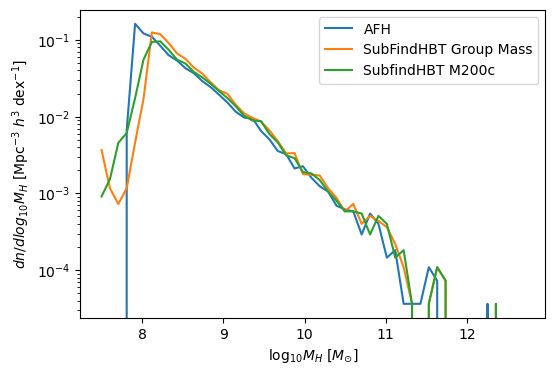

In [12]:
plt.plot(bins_func_ahf,hmf_ahf,label=f"AFH")
plt.plot(bins_func_gmass,hmf_gmass,label=f"SubFindHBT Group Mass")
plt.plot(bins_func,hmf,label=f"SubfindHBT M200c")

plt.yscale('log')
plt.xlabel(r'log$_{10}M_{H}$ [$M_{\odot}$]')
plt.ylabel(r'$dn/dlog_{10} M_H$ [Mpc$^{-3}$ $h^3$ dex$^{-1}$]')
plt.legend()

## Cumulative AHF and subfind subhalo comparison

In [13]:
subhaloes = ahf_dat[(ahf_dat['hostHalo']!=0) & (ahf_dat['fMhires']==1) & (ahf_dat['npart']>npart_min)]
# print(np.min(subhaloes['npart']))
subhalo_mass_ahf = np.sort(subhaloes['Mhalo'])[::-1] / LITTLEH
subhalo_mass_ahf = subhalo_mass_ahf[2:]
subhalo_cummass_func_ahf = np.cumsum(np.ones(len(subhalo_mass_ahf)))

In [14]:
## Cumulative Subhalo mass function
subh_mass  = np.array(haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS #/ LITTLEH 

subhalo_rank = np.array(haloinfo_data['Subhalo']['SubhaloRankInGr'], dtype=np.int32)
subhalo_masstypes = np.array(haloinfo_data['Subhalo']['SubhaloMassType'], dtype=np.float64)
subhalo_len_type = np.array(haloinfo_data['Subhalo']['SubhaloLenType'], dtype=np.int32)
# print(subhalo_len_type[(subhalo_len_type[:,1]==0) ]) # & (subhalo_len_type[:,5]==0)
# print(len(subhalo_len_type[(subhalo_len_type[:,1]==0) ]) )
outer_index = np.where(subhalo_rank!=0)[0]
clean_halos = np.where(subhalo_masstypes[:,5] == 0)[0]
real_halos  = np.where(subhalo_len_type[:,1] > npart_min)[0]

clean_halos = clean_halos[np.isin(clean_halos,outer_index)]
clean_halos = clean_halos[np.isin(clean_halos,real_halos)]

subh_mass = subh_mass[clean_halos]#[outer_index]

ordered_subhalos = np.argsort(subh_mass)[::-1]
subh_mass = subh_mass[ordered_subhalos][2:]
cummass_func_sub = np.cumsum(np.ones(subh_mass.shape[0]))
# cummass_func_sub = np.cumsum(np.ones(subh_mass.shape[0]))

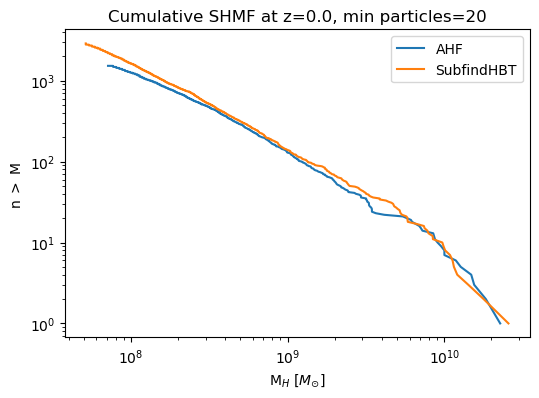

In [15]:
plt.plot(subhalo_mass_ahf,subhalo_cummass_func_ahf,label='AHF')
# plt.plot(subh_mass[ordered_subhalos],cummass_func_sub,label=f"SubfindHBT")
plt.plot(subh_mass,cummass_func_sub,label=f"SubfindHBT")
# z = np.round(z,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
# plt.ylabel(r'n $>$ M [Mpc$^{-3}$ $h^3$]')
plt.ylabel(r'n $>$ M ')
# plt.title(f'Cumulative SHMF at z={z}')
plt.title(f'Cumulative SHMF at z={z}, min particles={npart_min}')
plt.legend()
plt.savefig(f'./plots/cumulative_shmf_z_{z}_npart_{npart_min}.png',dpi=400,bbox_inches='tight')

## Comparison of AFH and subfindhbt for total haloes - subfind including rank 0 subhaloes

In [16]:
all_haloes = ahf_dat[(ahf_dat['fMhires']==1) & (ahf_dat['npart']>npart_min)] # (ahf_dat['hostHalo']==0) &
all_haloes = np.sort(all_haloes['Mhalo'])[::-1] / LITTLEH
all_haloes_cummass_func_ahf = np.cumsum(np.ones(len(all_haloes)))


all_haloes_mass  = np.array(haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS #/ LITTLEH 
all_haloes_masstypes = np.array(haloinfo_data['Subhalo']['SubhaloMassType'], dtype=np.float64)
all_haloes_len_type = np.array(haloinfo_data['Subhalo']['SubhaloLenType'], dtype=np.int32)
print(all_haloes_len_type[(all_haloes_len_type[:,1]==0) ]) # & (subhalo_len_type[:,5]==0)
print(len(all_haloes_len_type[(all_haloes_len_type[:,1]==0) ]) )

all_clean_halos = np.where(all_haloes_masstypes[:,5] == 0)[0]
all_real_halos  = np.where(all_haloes_len_type[:,1] > npart_min)[0]

# clean_halos = clean_halos[np.isin(clean_halos,outer_index)]
all_clean_halos = all_clean_halos[np.isin(all_clean_halos,all_real_halos)]

all_haloes_mass = all_haloes_mass[all_clean_halos]#[outer_index]

ordered_all_haloes = np.argsort(all_haloes_mass)[::-1]
cummass_func_all = np.cumsum(np.ones(all_haloes_mass[ordered_all_haloes].shape[0]))

[[ 0  0  0  0  0 42]
 [ 0  0  0  0  0 35]
 [ 0  0  0  0  0 22]
 ...
 [ 0  0  0  0  0 26]
 [ 0  0  0  0  0 27]
 [ 0  0  0  0  0 24]]
414


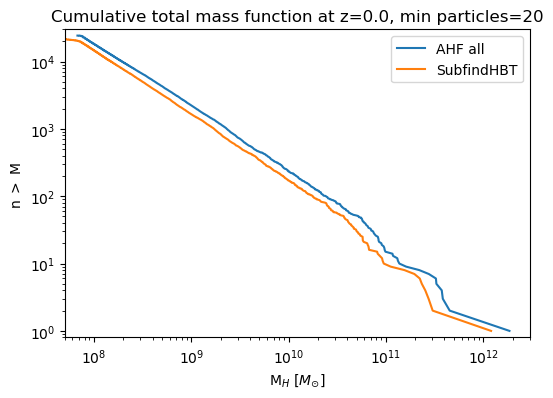

In [17]:
plt.plot(all_haloes,all_haloes_cummass_func_ahf,label='AHF all')
# plt.plot(halo_mass_ahf,cummass_func_ahf,label='AHF main')
plt.plot(all_haloes_mass[ordered_all_haloes],cummass_func_all,label=f"SubfindHBT")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
plt.ylabel(r'n $>$ M ')
plt.xlim((5e7,3e12))
plt.ylim((0.8,3e4))
plt.title(f'Cumulative total mass function at z={z}, min particles={npart_min}')
plt.legend()

In [18]:
subh_mass  = np.array(haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS / LITTLEH 
group_mass = np.array(haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
mass_m200c = np.array(haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH
group_N_subs   = np.array(haloinfo_data['Group']['GroupNsubs'], dtype=np.int32)
subhalo_group_num = np.array(haloinfo_data['Subhalo']['SubhaloGroupNr'], dtype=np.int32)

subhalo_mass_sum = []
for i,n_subs in enumerate(group_N_subs):
    subhalo_mass_sum.append(np.sum(subh_mass[subhalo_group_num==i]))
print(len(subhalo_mass_sum))
print(len(group_mass))
print(len(mass_m200c))

24597
24597
24597


/tmp/ipykernel_833742/3904000702.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(subhalo_mass_sum[0:300]/mass_m200c[0:300]-1)


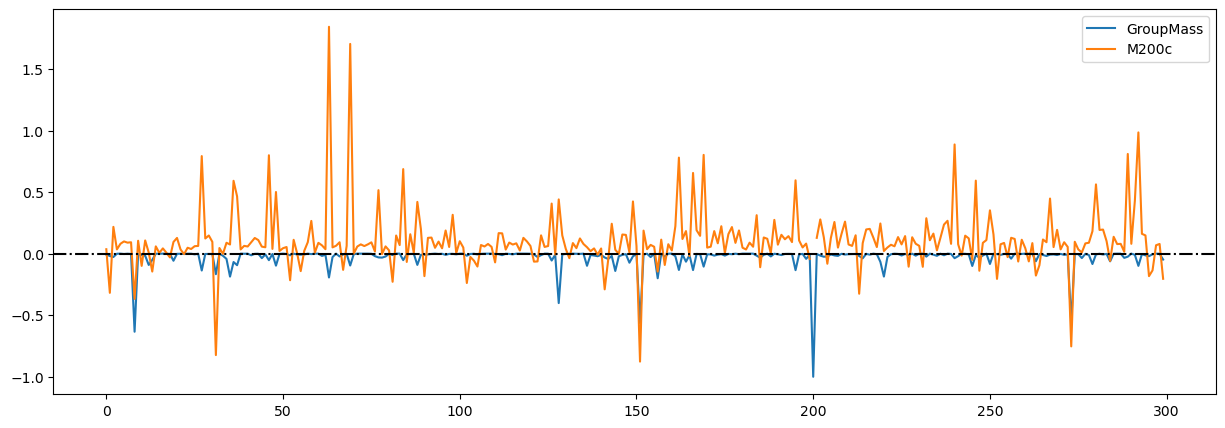

In [19]:
fig = plt.figure(figsize=(15,5))
plt.plot(subhalo_mass_sum[0:300]/group_mass[0:300]-1)
plt.plot(subhalo_mass_sum[0:300]/mass_m200c[0:300]-1)
plt.axhline(0,c='k',ls="-.")
plt.legend(("GroupMass","M200c"))
# plt.yscale('log')

## Comparison of Simulation for Alexander/Tomas - CDM

In [20]:
dmo_ahf_haloes = '/fred/oz009/aknebe/WDM2023/catalogues/cdm/cdm.snapshot_127.z0.000.AHF_halos'
dmo_ahf_cols = []
with open(dmo_ahf_haloes) as ahf_f:
    aux_dmo_ahf_cols = ahf_f.readline()[1:].split('\t')
    for el in aux_dmo_ahf_cols:
        dmo_ahf_cols.append(el.rpartition('(')[0])
dmo_ahf_cols = dmo_ahf_cols[:-1]
dmo_ahf_cols = np.array(dmo_ahf_cols)

dmo_ahf_dat = pd.read_table(dmo_ahf_haloes,delim_whitespace=True,names=dmo_ahf_cols,header=0)

dmo_ahf_dat_tmf = np.sort(dmo_ahf_dat['Mhalo'])[::-1] / LITTLEH
dmo_ahf_dat_cummass_func_ahf = np.cumsum(np.ones(len(dmo_ahf_dat_tmf)))

In [21]:
dmo_subfind = '/fred/oz217/aussing/a_knebe/cdm/output/fof_subhalo_tab_127.hdf5'
dmo_haloinfo_data = h5py.File(dmo_subfind,'r')
dmo_subh_mass  = np.array(dmo_haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS / LITTLEH 
dmo_subhalo_len = np.array(dmo_haloinfo_data['Subhalo']['SubhaloLen'], dtype=np.int32)
dmo_real_halos  = np.where(dmo_subhalo_len > npart_min)[0]

dmo_all_mass = dmo_subh_mass[dmo_real_halos]#[outer_index]

ordered_dmo_haloes = np.argsort(dmo_subh_mass)[::-1]
cummass_func_smo = np.cumsum(np.ones(dmo_subh_mass[ordered_dmo_haloes].shape[0]))

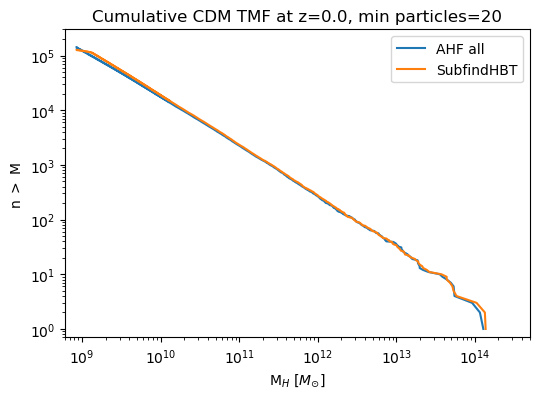

In [22]:
plt.plot(dmo_ahf_dat_tmf,dmo_ahf_dat_cummass_func_ahf,label='AHF all')
plt.plot(dmo_subh_mass[ordered_dmo_haloes],cummass_func_smo,label=f"SubfindHBT")
plt.xscale('log')
plt.yscale('log')
plt.xlim(6e8,5e14)
plt.ylim(7e-1,3e5)
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
plt.ylabel(r'n $>$ M ')
plt.title(f'Cumulative CDM TMF at z={z}, min particles={npart_min}')
plt.legend()

In [23]:
mainhaloes_dmo = dmo_ahf_dat[(dmo_ahf_dat['hostHalo']==0) & (dmo_ahf_dat['npart']>npart_min)]
dmo_ahf_dat_hmf = np.sort(mainhaloes_dmo['Mhalo'])[::-1] / LITTLEH
dmo_ahf_dat_cummass_func_ahf = np.cumsum(np.ones(len(dmo_ahf_dat_hmf)))

In [24]:
# dmo_subh_mass  = np.array(dmo_haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS / LITTLEH 
dmo_group_mass = np.array(dmo_haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
dmo_mass_m200c = np.array(dmo_haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH
dmo_masstypes  = np.array(dmo_haloinfo_data['Group']['GroupMassType'], dtype=np.float64) * UNITMASS / LITTLEH
# dmo_subhalo_len = np.array(dmo_haloinfo_data['Subhalo']['SubhaloLen'], dtype=np.int32)
# dmo_real_halos  = np.where(dmo_subhalo_len > npart_min)[0]

# dmo_clean_halos = np.where(dmo_masstypes[:,5] == 0)[0]
# dmo_grouplen_types = np.array(dmo_haloinfo_data['Group']['GroupLenType'], dtype=np.float64)
# dmo_real_halos = np.where(dmo_grouplen_types[:,1] > npart_min)[0]
# dmo_clean_halos = dmo_clean_halos[np.isin(dmo_clean_halos,dmo_real_halos)]

# dmo_group_mass = dmo_group_mass[clean_halos]
# dmo_mass_m200c = dmo_mass_m200c[clean_halos]

ordered_dmo_group_mass = np.argsort(dmo_group_mass)[::-1]
ordered_dmo_mass_m200c = np.argsort(dmo_mass_m200c)[::-1]

dmo_cummass_func_MH = np.cumsum(np.ones(dmo_group_mass[ordered_dmo_group_mass].shape[0]))
dmo_cummass_func_200 = np.cumsum(np.ones(dmo_mass_m200c[ordered_dmo_mass_m200c].shape[0]))


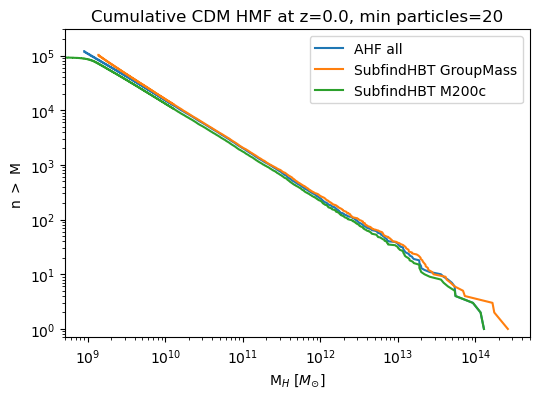

In [25]:
plt.plot(dmo_ahf_dat_hmf,dmo_ahf_dat_cummass_func_ahf,label='AHF all')
plt.plot(dmo_group_mass[ordered_dmo_group_mass],dmo_cummass_func_MH,label=f"SubfindHBT GroupMass")
plt.plot(dmo_mass_m200c[ordered_dmo_mass_m200c],dmo_cummass_func_200,label=f"SubfindHBT M200c")
plt.xscale('log')
plt.yscale('log')
plt.xlim(5e8,5e14)
plt.ylim(7e-1,3e5)
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
plt.ylabel(r'n $>$ M ')
plt.title(f'Cumulative CDM HMF at z={z}, min particles={npart_min}')
plt.legend()

In [26]:
dmo_snap_data = h5py.File('/fred/oz217/aussing/a_knebe/cdm/output/snapshot_127.hdf5','r')
dmo_pos_data = h5py.File('/fred/oz217/aussing/a_knebe/cdm/output/snapshot_000.hdf5', 'r') 
dmo_unit_length = get_unit_len(dmo_snap_data)

dmo_box_volume = (snap_data['Header'].attrs['BoxSize'] * unit_length)**3 
print(set_plot_len(dmo_box_volume**(1/3)))

dmo_group_mass = np.array(dmo_haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
dmo_mass_m200c = np.array(dmo_haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH

bin_width = 0.1
num_of_bins = np.int32((np.max(np.log10(dmo_group_mass)+1e-4) - np.min(np.log10(dmo_group_mass))-1e-4)/bin_width)
bin_range = np.linspace(np.min(np.log10(dmo_group_mass)-1e-4),np.max(np.log10(dmo_group_mass)+1e-4),num_of_bins)


dmo_mass_func_m200,dmo_bins_func_m200 = np.histogram(np.log10(dmo_mass_m200c),bin_range)
for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    dmo_bins_func_m200[i]=dmo_bins_func_m200[i]+(dmo_bins_func_m200[i+1]-dmo_bins_func_m200[i])/2
dmo_bins_func_m200=dmo_bins_func_m200[:-1]
dmo_hmf_m200c = dmo_mass_func_m200/(bin_width*set_plot_len(set_plot_len(set_plot_len(dmo_box_volume))))


dmo_mass_func_gmass,dmo_bins_func_gmass = np.histogram(np.log10(dmo_group_mass),bin_range)
for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    dmo_bins_func_gmass[i]=dmo_bins_func_gmass[i]+(dmo_bins_func_gmass[i+1]-dmo_bins_func_gmass[i])/2
dmo_bins_func_gmass=dmo_bins_func_gmass[:-1]
dmo_hmf_gmass = dmo_mass_func_gmass/(bin_width*set_plot_len(set_plot_len(set_plot_len(dmo_box_volume))))


dmo_mass_func_ahf,dmo_bins_func_ahf = np.histogram(np.log10(dmo_ahf_dat_hmf),bin_range)
for i in range(num_of_bins-1): #Change from bin edges to bin centres, remove last value in bins_func when plotting
    dmo_bins_func_ahf[i]=dmo_bins_func_ahf[i]+(dmo_bins_func_ahf[i+1]-dmo_bins_func_ahf[i])/2
dmo_bins_func_ahf=dmo_bins_func_ahf[:-1]

dmo_hmf_ahf = dmo_mass_func_ahf/(bin_width*set_plot_len(set_plot_len(set_plot_len(dmo_box_volume))))

64.99999999999979


/tmp/ipykernel_833742/2911906511.py:16: RuntimeWarning: divide by zero encountered in log10
  dmo_mass_func_m200,dmo_bins_func_m200 = np.histogram(np.log10(dmo_mass_m200c),bin_range)


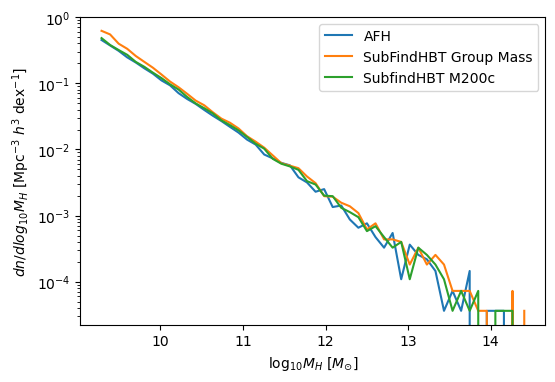

In [27]:
plt.plot(dmo_bins_func_ahf,dmo_hmf_ahf,label=f"AFH")
plt.plot(dmo_bins_func_gmass,dmo_hmf_gmass,label=f"SubFindHBT Group Mass")
plt.plot(dmo_bins_func_m200,dmo_hmf_m200c,label=f"SubfindHBT M200c")

plt.yscale('log')
plt.xlabel(r'log$_{10}M_{H}$ [$M_{\odot}$]')
plt.ylabel(r'$dn/dlog_{10} M_H$ [Mpc$^{-3}$ $h^3$ dex$^{-1}$]')
plt.legend()

In [28]:
subhaloes_dmo = dmo_ahf_dat[(dmo_ahf_dat['hostHalo']!=0) & (dmo_ahf_dat['fMhires']==1) & (dmo_ahf_dat['npart']>npart_min)]
dmo_ahf_dat_shmf = np.sort(subhaloes_dmo['Mhalo'])[::-1] / LITTLEH
dmo_ahf_dat_cummass_func_shmf = np.cumsum(np.ones(len(dmo_ahf_dat_shmf)))


In [29]:
dmo_subh_mass  = np.array(dmo_haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS / LITTLEH 
dmo_subhalo_len = np.array(dmo_haloinfo_data['Subhalo']['SubhaloLen'], dtype=np.int32)
dmo_subhalo_rank = np.array(dmo_haloinfo_data['Subhalo']['SubhaloRankInGr'], dtype=np.int32)

dmo_real_halos  = np.where(dmo_subhalo_len > npart_min)[0]
outer_index = np.where(subhalo_rank!=0)[0]

dmo_subh_mass = dmo_subh_mass[outer_index]

ordered_dmo_haloes = np.argsort(dmo_subh_mass)[::-1]
cummass_func_shmf = np.cumsum(np.ones(dmo_subh_mass[ordered_dmo_haloes].shape[0]))

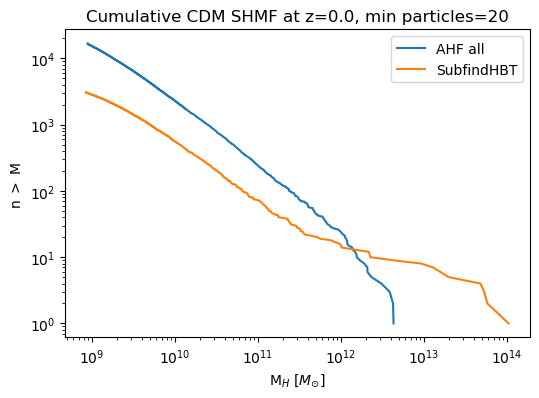

In [30]:
plt.plot(dmo_ahf_dat_shmf,dmo_ahf_dat_cummass_func_shmf,label='AHF all')
plt.plot(dmo_subh_mass[ordered_dmo_haloes],cummass_func_shmf,label=f"SubfindHBT")
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'M$_{H}$ [$M_{\odot}$]')
plt.ylabel(r'n $>$ M ')
plt.title(f'Cumulative CDM SHMF at z={z}, min particles={npart_min}')
plt.legend()

In [31]:
dmo_subfind = '/fred/oz217/aussing/a_knebe/cdm/output/fof_subhalo_tab_127.hdf5'
dmo_subh_mass  = np.array(dmo_haloinfo_data['Subhalo']['SubhaloMass'], dtype=np.float64) * UNITMASS / LITTLEH 
dmo_group_mass = np.array(dmo_haloinfo_data['Group']['GroupMass'], dtype=np.float64) * UNITMASS / LITTLEH
dmo_mass_m200c = np.array(dmo_haloinfo_data['Group']['Group_M_Crit200'], dtype=np.float64) * UNITMASS / LITTLEH
group_N_subs   = np.array(dmo_haloinfo_data['Group']['GroupNsubs'], dtype=np.int32)
dmo_subhalo_group_num = np.array(dmo_haloinfo_data['Subhalo']['SubhaloGroupNr'], dtype=np.int32)

subhalo_mass_sum = []
for i,n_subs in enumerate(group_N_subs):
    subhalo_mass_sum.append(np.sum(dmo_subh_mass[dmo_subhalo_group_num==i]))
print(len(subhalo_mass_sum))
print(len(dmo_group_mass))
print(len(dmo_mass_m200c))

102543
102543
102543


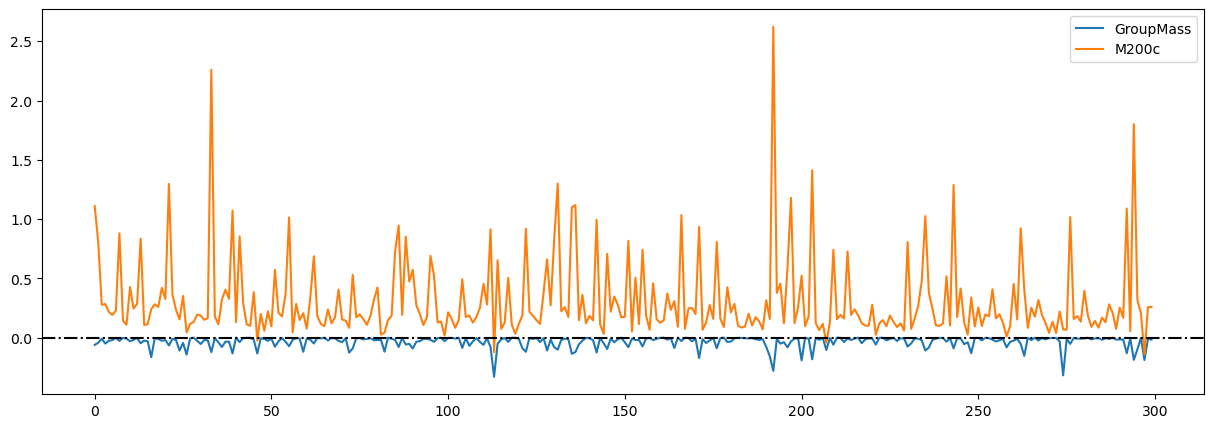

In [32]:
fig = plt.figure(figsize=(15,5))
plt.plot(subhalo_mass_sum[0:300]/dmo_group_mass[0:300]-1)
plt.plot(subhalo_mass_sum[0:300]/dmo_mass_m200c[0:300]-1)
plt.axhline(0,c='k',ls="-.")
plt.legend(("GroupMass","M200c"))
# plt.yscale('log')